# 📚 Table des matières du projet Fine-Tuning GPT-Neo 1.3B (Arabe QA)

## 📌 Schéma du Notebook : Fine-Tuning GPT-Neo 1.3B pour la QA en arabe

```plaintext
Jeux de données CSV (arabicmmlu, alghafa, madinahqa, aratrust)
          │
          ▼
Conversion au format génération (`### سؤال` / `### الإجابة`)
          │
          ▼
Sauvegarde en JSONL
          │
          ▼
Chargement et split (train/test) avec HuggingFace Datasets
          │
          ▼
Tokenisation (Padding & Truncation, `max_length=512`)
          │
          ▼
Chargement GPT-Neo avec QLoRA 4-bit (LoRA : `q_proj`, `v_proj`)
          │
          ▼
Fine-Tuning (`SFTTrainer`, 500 puis 1000 steps)
          │
          ▼
Évaluation du modèle (Accuracy, Precision, Recall, F1)
          │
          ▼
Sauvegarde modèle fine-tuné
          │
          ▼
Création de l’index FAISS (embeddings multilingues SentenceTransformers)
          │
          ▼
Évaluation du Retriever FAISS (Recall@k, MRR, Exact Match, Word-F1)
          │
          ▼
Pipeline RAG complet (`Retriever FAISS` + `GPT-Neo fine-tuné`)
          │
          ▼
Évaluation finale de la génération (Exact Match, Word-F1, ROUGE, BERTScore)


# 📊 Résultats d'Évaluation du Modèle GPT-Neo Fine-Tuné (Génération)
*(sur 100 exemples d'un total de 16,146 disponibles)*

| Métrique     | Valeur |
|--------------|--------|
| **Accuracy** | 0.0200 |
| **Precision**| 0.0101 |
| **Recall**   | 0.0101 |
| **F1-score** | 0.0101 |

---

# 📚 Résultats d'Évaluation du Retriever FAISS


| Métrique              | Valeur |
|-----------------------|--------|
| **Recall@5**          | 0.8600 |
| **MRR@5**             | 0.7887 |
| **Exact Match (EM)**  | 0.0000 |
| **Word-level F1**     | 0.6113 |

---

# 📊 Résultats de l'Évaluation de la Génération du Modèle GPT-Neo

| Métrique              | Valeur  |
|-----------------------|---------|
| **Exact Match (EM)**  | 0.0000  |
| **Word-level F1**     | 0.0000  |
| **ROUGE-L**           | 0.0000  |
| **BERTScore-F1**      | 0.6119  |

---



# 📦 Installation des dépendances

**transformers**, **datasets**, **trl**, **peft**, **bitsandbytes**, **accelerate**

Montage de **Google Drive**

In [ ]:
pip install transformers accelerate peft bitsandbytes datasets trl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.7/335.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

prepare les doner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 📝 Préparation des données

1. Chargement des fichiers CSV : arabicmmlu.csv, alghafa.csv, madinahqa.csv, aratrust.csv.

2. Construction des prompts (format ### سؤال / ### الإجابة)

3. Sauvegarde en fichier .jsonl

In [ ]:
import pandas as pd

# === 1. arabicmmlu.csv ===
print("\n📘 Fichier : arabicmmlu.csv")
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv")
print("🔑 Colonnes :", df1.columns.tolist())
print("👀 Exemple de lignes :")
print(df1.head(2))
print("="*60)

# === 2. alghafa.csv ===
print("\n📘 Fichier : alghafa.csv")
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv")
print("🔑 Colonnes :", df2.columns.tolist())
print("👀 Exemple de lignes :")
print(df2.head(2))
print("="*60)

# === 3. madinahqa.csv ===
print("\n📘 Fichier : madinahqa.csv")
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv")
df3.columns = df3.columns.str.strip()  # nettoyage éventuel des colonnes
print("🔑 Colonnes :", df3.columns.tolist())
print("👀 Exemple de lignes :")
print(df3.head(2))
print("="*60)

# === 4. aratrust.csv ===
print("\n📘 Fichier : aratrust.csv")
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv")
df4.columns = df4.columns.str.strip()
print("🔑 Colonnes :", df4.columns.tolist())
print("👀 Exemple de lignes :")
print(df4.head(2))
print("="*60)


In [ ]:
import pandas as pd

# === 1. arabicmmlu.csv ===
print("\n📘 Fichier : arabicmmlu.csv")
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv")
print("🔑 Colonnes :", df1.columns.tolist())
print("👀 Exemple de lignes :")
print(df1.head(2))
print("="*60)

# === 2. alghafa.csv ===
print("\n📘 Fichier : alghafa.csv")
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv")
print("🔑 Colonnes :", df2.columns.tolist())
print("👀 Exemple de lignes :")
print(df2.head(2))
print("="*60)

# === 3. madinahqa.csv ===
print("\n📘 Fichier : madinahqa.csv")
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv")
df3.columns = df3.columns.str.strip()  # nettoyage éventuel des colonnes
print("🔑 Colonnes :", df3.columns.tolist())
print("👀 Exemple de lignes :")
print(df3.head(2))
print("="*60)

# === 4. aratrust.csv ===
print("\n📘 Fichier : aratrust.csv")
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv")
df4.columns = df4.columns.str.strip()
print("🔑 Colonnes :", df4.columns.tolist())
print("👀 Exemple de lignes :")
print(df4.head(2))
print("="*60)


In [ ]:
import pandas as pd
import json

def make_prompt_response(question, context="", options="", answer=""):
    prompt = "### سؤال:\n"
    if context:
        prompt += f"{str(context).strip()}\n"
    prompt += f"{str(question).strip()}\n"
    if options:
        prompt += f"{str(options).strip()}\n"
    prompt += "\n### الإجابة:\n" + str(answer).strip()
    return prompt

def make_explanatory_answer(question, answer_text):
    return f"{question.strip()} الإجابة هي: {answer_text.strip()}."

examples = []

# === 1. arabicmmlu.csv ===
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv").fillna("")
letter_to_option = {
    "أ": "Option 1", "ب": "Option 2", "ج": "Option 3", "د": "Option 4", "هـ": "Option 5",
    "A": "Option 1", "B": "Option 2", "C": "Option 3", "D": "Option 4", "E": "Option 5"
}

for _, row in df1.iterrows():
    answer_key = str(row["Answer Key"]).strip()
    correct_answer = str(row.get(letter_to_option.get(answer_key, ""), "")).strip()
    options = f"أ. {row['Option 1']}  ب. {row['Option 2']}  ج. {row['Option 3']}  د. {row['Option 4']}  هـ. {row['Option 5']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], row['Context'], options, answer_text)
    examples.append({"text": prompt})

# === 2. alghafa.csv ===
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv").fillna("")
index_to_option = {"0": "sol1", "1": "sol2", "2": "sol3", "3": "sol4"}

for _, row in df2.iterrows():
    answer_key = str(row["label"]).strip()
    correct_answer = str(row.get(index_to_option.get(answer_key, ""), "")).strip()
    options = f"أ. {row['sol1']}  ب. {row['sol2']}  ج. {row['sol3']}  د. {row['sol4']}"
    answer_text = make_explanatory_answer(row['query'], correct_answer)
    prompt = make_prompt_response(row['query'], options=options, answer=answer_text)
    examples.append({"text": prompt})

# === 3. madinahqa.csv ===
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv").fillna("")
df3.columns = df3.columns.str.strip()

for _, row in df3.iterrows():
    context = f"🔹 المصدر: {row['Source']} | الدولة: {row['Country']} | المجموعة: {row['Group']} | المادة: {row['Subject']} | المستوى: {row['Level']}\n📝 السياق: {row['Context']}"
    answer_key = str(row["Answer Key"]).strip()
    correct_answer = str(row.get(letter_to_option.get(answer_key, ""), "")).strip()
    options = f"أ. {row['Option 1']}  ب. {row['Option 2']}  ج. {row['Option 3']}  د. {row['Option 4']}  هـ. {row['Option 5']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], context=context, options=options, answer=answer_text)
    examples.append({"text": prompt})

# === 4. aratrust.csv ===
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv").fillna("")
df4.columns = df4.columns.str.strip()
letter_to_option_aratrust = {"أ": "A", "ب": "B", "ج": "C"}

for _, row in df4.iterrows():
    answer_key = str(row["Answer"]).strip()
    correct_answer = str(row.get(letter_to_option_aratrust.get(answer_key, ""), "")).strip()
    options = f"أ. {row['A']}  ب. {row['B']}  ج. {row['C']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], options=options, answer=answer_text)
    examples.append({"text": prompt})

# === Sauvegarde finale ===
output_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
with open(output_path, "w", encoding="utf-8") as f:
    for ex in examples:
        json.dump(ex, f, ensure_ascii=False)
        f.write("\n")

print(f"✅ Données prêtes au format génération : {output_path} — {len(examples)} exemples")


# example **DATA**

In [ ]:
import json

# Chemin vers ton fichier
file_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"

# Lire les 5 premiers exemples
with open(file_path, "r", encoding="utf-8") as f:
    for i in range(5):
        line = f.readline()
        if not line:
            break
        example = json.loads(line)
        print(f"\n🔹 Exemple {i+1} :\n")
        print(example["text"])
        print("="*50)



🔹 Exemple 1 :

### سؤال:
كم عدد سور القرآن الكريم؟
أ. 111  ب. 112  ج. 113  د. 114  هـ.

### الإجابة:
كم عدد سور القرآن الكريم؟ الإجابة هي: 114.

🔹 Exemple 2 :

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
في أي الأيام خلق سيدنا آدم عليه السلام؟ الإجابة هي: يوم الجمعة.

🔹 Exemple 3 :

### سؤال:
كم عدد السنوات التي نام فيها أهل الكهف؟
أ. 300 سنة  ب. 309 سنوات  ج. 400 سنة  د. 409 سنوات  هـ.

### الإجابة:
كم عدد السنوات التي نام فيها أهل الكهف؟ الإجابة هي: 309 سنوات.

🔹 Exemple 4 :

### سؤال:
اسم أول صحابي قرأ القرآن جهرة؟
أ. عبد الله بن مسعود  ب. عبد الله بن عباس  ج. عبد الله بن عمرو بن العاص  د. عبد الله بن الزبير  هـ.

### الإجابة:
اسم أول صحابي قرأ القرآن جهرة؟ الإجابة هي: عبد الله بن مسعود.

🔹 Exemple 5 :

### سؤال:
من هي أخر زوجات النبي التي توفيت؟
أ. السيدة زينب بنت جحش  ب. السيدة عائشة بنت أبي بكر  ج. السيدة أم سلمة  د. السيدة سودة بنت زمعة  هـ.

### الإجابة:
من هي أخر زوجات النبي التي توفيت؟ الإج

# Chargement du dataset HuggingFace

1. Chargement avec load_dataset()

2. Split en train / test

In [ ]:
from datasets import load_dataset

data_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
dataset = load_dataset("json", data_files=data_path, split="train")

# Split train / test
dataset = dataset.train_test_split(test_size=0.1)


Generating train split: 0 examples [00:00, ? examples/s]

# Chargement du modèle GPT-Neo 1.3B

1. Tokenizer

2. Quantization 4-bit (BitsAndBytesConfig)

3. Configuration LoRA (q_proj, v_proj)

4. Affichage des paramètres LoRA entraînables

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model
import torch

model_name = "EleutherAI/gpt-neo-1.3B"

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # obligatoire pour éviter les erreurs de padding

# Configuration pour 4-bit (QLoRA)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

# Chargement du modèle avec quantization 4bit
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto"
)

# Préparer le modèle pour l'entraînement LoRA
model = prepare_model_for_kbit_training(model)

# Configuration LoRA (✅ modules compatibles avec GPT-Neo)
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_proj", "v_proj"],  # ✔️ modules pris en charge
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM"
)

# Appliquer LoRA
model = get_peft_model(model, lora_config)

# Afficher les paramètres entraînables
model.print_trainable_parameters()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

trainable params: 1,572,864 || all params: 1,317,148,672 || trainable%: 0.1194


# Tokenisation des données

1.Tokenisation avec padding et truncation (max_length=512)

2.Suppression de la colonne text

In [ ]:
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

tokenized_dataset = dataset.map(tokenize, batched=True, remove_columns=["text"])


Map:   0%|          | 0/14531 [00:00<?, ? examples/s]

Map:   0%|          | 0/1615 [00:00<?, ? examples/s]

# 🏋️ Configuration de l’entraînement

1. Paramètres TrainingArguments

2. Utilisation de SFTTrainer

3. Nombre de steps : 500, puis 1000

In [ ]:
from transformers import TrainingArguments
from trl import SFTTrainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/fine_tuned_gptneo_arabic",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    warmup_steps=10,
    max_steps=1000,  # Tu peux mettre 1000 ou 2000 si tu veux un meilleur résultat
    learning_rate=2e-4,
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=100,
    save_steps=100,
    save_total_limit=2,
    fp16=True,
    report_to="none",  # pas besoin de wandb/logging externe
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Lancement du fine-tuning

In [ ]:
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    args=training_args,
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Truncating train dataset:   0%|          | 0/14531 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/1615 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
import time

start_time = time.time()

# 🔁 Lancer l'entraînement
trainer.train()

end_time = time.time()

# 🕒 Afficher la durée
elapsed = end_time - start_time
minutes = elapsed // 60
seconds = elapsed % 60

print(f"\n⏱️ Temps total d'entraînement : {int(minutes)} min {int(seconds)} sec")


Step,Training Loss,Validation Loss
100,0.945500,0.915232
200,0.926800,0.873233
300,0.857100,0.848003
400,0.853600,0.833645
500,0.873400,0.823312
600,0.781900,0.815506
700,0.843900,0.809468
800,0.809100,0.804898
900,0.799600,0.801702
1000,0.781600,0.800176


/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/


⏱️ Temps total d'entraînement : 99 min 34 sec


# Visualisation de la perte

Courbes **training_loss** et **validation_loss**

<ipython-input-31-c071bcd1dacb>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


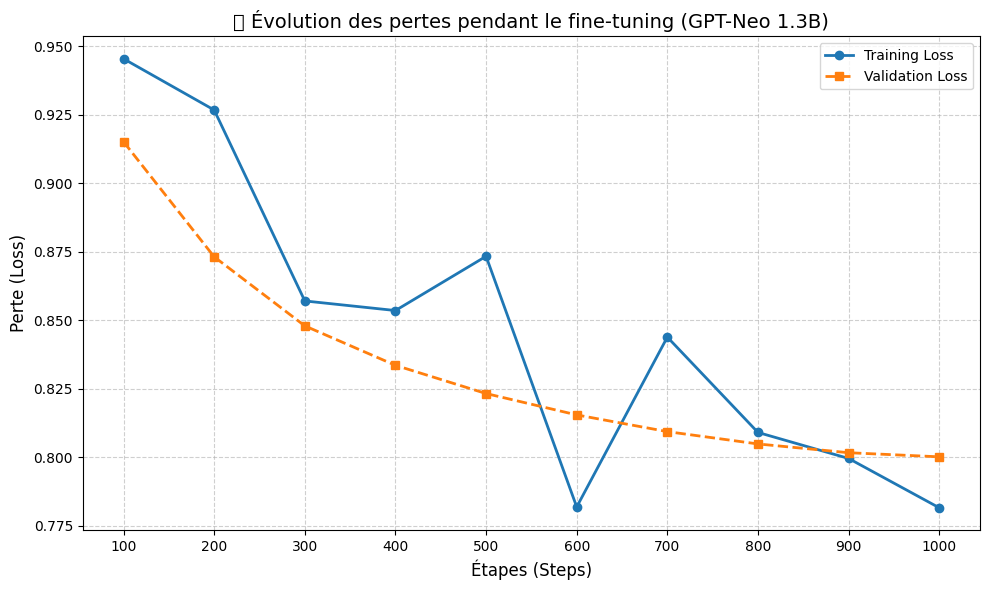

In [ ]:
import matplotlib.pyplot as plt

# Données collectées pendant le fine-tuning
steps = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
training_loss = [0.9455, 0.9268, 0.8571, 0.8536, 0.8734, 0.7819, 0.8439, 0.8091, 0.7996, 0.7816]
validation_loss = [0.9152, 0.8732, 0.8480, 0.8336, 0.8233, 0.8155, 0.8094, 0.8049, 0.8017, 0.8002]

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(steps, training_loss, marker='o', label='Training Loss', linewidth=2)
plt.plot(steps, validation_loss, marker='s', label='Validation Loss', linewidth=2, linestyle='--')
plt.xlabel("Étapes (Steps)", fontsize=12)
plt.ylabel("Perte (Loss)", fontsize=12)
plt.title("📉 Évolution des pertes pendant le fine-tuning (GPT-Neo 1.3B)", fontsize=14)
plt.xticks(steps)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


 Sauvegarde automatique du modèle

# Évaluation du modèle fine-tuné

In [ ]:
# 📦 Sauvegarde du modèle fine-tuné
save_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"\n✅ Modèle et tokenizer sauvegardés dans : {save_path}")



✅ Modèle et tokenizer sauvegardés dans : /content/drive/MyDrive/final_model_gptneo_arabic_gen


In [ ]:
import json
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# === 1. Charger les données d’évaluation ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"

with open(jsonl_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

# === 2. Séparer prompts et vraies réponses (max 500 exemples) ===
prompts = []
true_answers = []

for item in data:
    if "### الإجابة:" in item["text"]:
        parts = item["text"].split("### الإجابة:")
        prompt = parts[0] + "### الإجابة:\n"
        answer = parts[1].strip()
        prompts.append(prompt)
        true_answers.append(answer)
    if len(prompts) >= 100:
        break


# === 3. Charger le modèle fine-tuné ===
model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"

model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# === 4. Générer les prédictions ===
predicted_answers = []

print("⏳ Génération des réponses...")
for prompt in tqdm(prompts):
    output = pipe(prompt, max_new_tokens=50, do_sample=False, temperature=0.0)
    generated = output[0]["generated_text"]
    response = generated.split("### الإجابة:")[-1].strip()
    predicted_answers.append(response)

# === 5. Calculer les métriques ===
def compute_metrics(preds, labels):
    preds = [p.strip() for p in preds]
    labels = [l.strip() for l in labels]
    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, average='macro', zero_division=0),
        "recall": recall_score(labels, preds, average='macro', zero_division=0),
        "f1": f1_score(labels, preds, average='macro', zero_division=0)
    }

metrics = compute_metrics(predicted_answers, true_answers)

# === 6. Afficher les résultats ===
print("\n📊 Résultats d’évaluation :")
for k, v in metrics.items():
    print(f"{k.capitalize()}: {v:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

Device set to use cpu


⏳ Génération des réponses...


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
100%|██████████| 100/100 [1:00:53<00:00, 36.54s/it]


📊 Résultats d’évaluation :
Accuracy: 0.0200
Precision: 0.0101
Recall: 0.0101
F1: 0.0101


## test

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

# === Charger le modèle fine-tuné ===
model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"

model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)





Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


🧪 Réponse générée :

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟

يرجى إعطاء إجابة مباشرة بدون شرح.

### الإجابة:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟


In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# Prompt au bon format (conforme à l'entraînement)
prompt = """### سؤال:
كم عدد سور القرآن الكريم؟
أ. 111  ب. 112  ج. 113  د. 114  هـ.

### الإجابة:
"""

# Génération de la réponse
output = pipe(
    prompt,
    max_new_tokens=50,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.2
)

# Affichage
print("🧪 Réponse générée :\n")
print(output[0]["generated_text"])


Device set to use cpu


🧪 Réponse générée :

### سؤال:
كم عدد سور القرآن الكريم؟
أ. 111  ب. 112  ج. 113  د. 114  هـ.

### الإجابة:
كم عدد سور القرآن الكريم؟ الإجابة هي: 111. الإجابة ه


In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### تعليمات:
أجب فقط بإجابة نهائية مباشرة بدون شرح أو تكرار، وبصيغـة: "الإجابة هي: ...." دون أي إضافات.

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
الإجابة هي:"""







output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("🧪 Réponse générée :\n")
print(output[0]["generated_text"])




Device set to use cpu


🧪 Réponse générée :

### تعليمات:
أجب فقط بإجابة نهائية مباشرة بدون شرح أو تكرار، وبصيغـة: "الإجابة هي: ...." دون أي إضافات.

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
الإجابة هي: يوم الأربعاء.

### الإ�


In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### تعليمات:
أجب فقط بإجابة نهائية بصيغة: "الإجابة هي: ..." بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟
أ. بن بلة  ب. الشاذلي بن جديد  ج. هواري بومدين  د. عبد العزيز بوتفليقة  هـ.

### الإجابة:
الإجابة هي: بن بلة.

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
الإجابة هي:"""








output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("🧪 Réponse générée :\n")
print(output[0]["generated_text"])




Device set to use cpu


🧪 Réponse générée :

### تعليمات:
أجب فقط بإجابة نهائية بصيغة: "الإجابة هي: ..." بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟
أ. بن بلة  ب. الشاذلي بن جديد  ج. هواري بومدين  د. عبد العزيز بوتفليقة  هـ.

### الإجابة:
الإجابة هي: بن بلة.

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
الإجابة هي: يوم الأربعاء.

### سؤ


In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### تعليمات:
أجب فقط بإجابة نهائية بصيغة: "الإجابة هي: ..." بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟
أ. بن بلة  ب. الشاذلي بن جديد  ج. هواري بومدين  د. عبد العزيز بوتفليقة  هـ.

### الإجابة:
الإجابة هي:"""








output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("🧪 Réponse générée :\n")
print(output[0]["generated_text"])




Device set to use cpu


🧪 Réponse générée :

### تعليمات:
أجب فقط بإجابة نهائية بصيغة: "الإجابة هي: ..." بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟
أ. بن بلة  ب. الشاذلي بن جديد  ج. هواري بومدين  د. عبد العزيز بوتفليقة  هـ.

### الإجابة:
الإجابة هي: بن بلة.

### الإجابة:


In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# Prompt solide
prompt = """### تعليمات:
أجب فقط بصيغة نهائية كالتالي: "الإجابة هي: ..." بدون إعادة السؤال أو أي شرح.

### سؤال:
اسم أول صحابي قرأ القرآن جهرة؟
أ. عبد الله بن مسعود  ب. عبد الله بن عباس  ج. عبد الله بن عمرو بن العاص  د. عبد الله بن الزبير  هـ.

### الإجابة:
الإجابة هي:"""

# Génération avec plus de tokens
output = pipe(
    prompt,
    max_new_tokens=20,  # ⬅️ plus de tokens ici
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.5
)

# Extraction et nettoyage
generated = output[0]["generated_text"]
raw_answer = generated.split("الإجابة هي:")[-1].strip()
clean_answer = raw_answer.replace("...", "").replace("..", "").strip(" .\n:")
final_answer = f"الإجابة هي: {clean_answer}."

# Affichage
print("✅ Réponse propre:", final_answer)


Device set to use cpu


✅ Réponse propre: الإجابة هي: عبد الله بن عباس.

###.


# RAG_PIPLINE

INSTALLATION DES BIBLIOTHÈQUES POUR LE RAG_PIPELINE

In [ ]:
pip install -q langchain faiss-cpu sentence-transformers


In [ ]:
!pip install -U langchain langchain-community faiss-cpu sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1

1.crée un index de recherche sémantique FAISS

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS


In [ ]:
import json
from tqdm import tqdm
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.schema import Document

# === 1. Charger le fichier JSONL contenant les prompts QA ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
with open(jsonl_path, "r", encoding="utf-8") as f:
    data = [json.loads(line)["text"] for line in f]

print(f"✅ Total d'exemples chargés : {len(data)}")

# === 2. Créer les objets Document pour LangChain ===
all_docs = [Document(page_content=text) for text in data]

# === 3. Initialiser le modèle d'embedding multilingue ===
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# === 4. Créer l’index FAISS ===
print("🔄 Création de l'index FAISS...")
vectorstore = FAISS.from_documents(all_docs, embedding_model)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 5. Sauvegarder l’index FAISS dans Google Drive ===
faiss_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
vectorstore.save_local(faiss_path)
print(f"✅ Index FAISS sauvegardé dans : {faiss_path}")


✅ Total d'exemples chargés : 16146


<ipython-input-11-196b19f0fd3a>:18: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional t

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

🔄 Création de l'index FAISS...
✅ Index FAISS sauvegardé dans : /content/drive/MyDrive/arabic_qa_generation_faiss


2. Évaluation du Retriever FAISS avec LangChain sur des données de Question-Réponse en Arabe

In [ ]:
import json
from tqdm import tqdm
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# === 1. Charger FAISS retriever ===
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 2. Charger 100 exemples de test ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
questions, answers = [], []

with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        example = json.loads(line)
        text = example["text"]
        if "### سؤال:" in text and "### الإجابة:" in text:
            q, a = text.split("### الإجابة:")
            questions.append(q.strip())
            answers.append(a.strip())
        if len(questions) >= 100:
            break

# === 3. Fonction de comparaison de chaînes ===
def normalize(text):
    return text.strip().lower()

def compute_metrics(questions, answers, retriever, k=5):
    recall_k = 0
    mrr_total = 0
    em_total = 0
    f1_total = 0

    for q, true_answer in tqdm(zip(questions, answers), total=len(questions)):
        retrieved_docs = retriever.get_relevant_documents(q)
        retrieved_texts = [doc.page_content for doc in retrieved_docs]

        found = False
        for rank, doc in enumerate(retrieved_texts):
            if normalize(true_answer) in normalize(doc):
                recall_k += 1
                mrr_total += 1 / (rank + 1)
                found = True
                break

        # Exact Match (EM)
        em = any(normalize(true_answer) == normalize(doc) for doc in retrieved_texts)
        em_total += int(em)

        # Word-level F1
        def f1_word(pred, truth):
            pred_tokens = set(normalize(pred).split())
            truth_tokens = set(normalize(truth).split())
            if len(pred_tokens) == 0 or len(truth_tokens) == 0:
                return 0
            common = pred_tokens & truth_tokens
            if not common:
                return 0
            precision = len(common) / len(pred_tokens)
            recall = len(common) / len(truth_tokens)
            return 2 * (precision * recall) / (precision + recall)

        best_f1 = max(f1_word(doc, true_answer) for doc in retrieved_texts)
        f1_total += best_f1

    total = len(questions)
    return {
        "Recall@k": recall_k / total,
        "MRR@k": mrr_total / total,
        "Exact Match": em_total / total,
        "Word-level F1": f1_total / total
    }

# === 4. Évaluer et afficher ===
metrics = compute_metrics(questions, answers, retriever, k=5)

print("\n📊 Résultats d’évaluation du Retriever (FAISS) :")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


100%|██████████| 100/100 [00:03<00:00, 32.89it/s]


📊 Résultats d’évaluation du Retriever (FAISS) :
Recall@k: 0.8600
MRR@k: 0.7887
Exact Match: 0.0000
Word-level F1: 0.6113


In [ ]:
pip install scikit-learn


In [ ]:
import json
from tqdm import tqdm
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
import numpy as np

# === 1. Charger le FAISS retriever ===
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 2. Charger les données de test ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
questions, answers = [], []

with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        example = json.loads(line)
        text = example["text"]
        if "### سؤال:" in text and "### الإجابة:" in text:
            q, a = text.split("### الإجابة:")
            questions.append(q.strip())
            answers.append(a.strip())
        if len(questions) >= 100:
            break

# === 3. Normalisation simple pour comparaison ===
def normalize(text):
    return text.strip().lower().replace("،", "").replace(".", "").replace("?", "").replace("!", "")

# === 4. Fonction d’évaluation ===
def compute_metrics(questions, answers, retriever, k=5):
    recall_k = 0
    mrr_total = 0
    em_total = 0
    f1_total = 0
    correct_predictions = 0  # Pour l'Accuracy

    for q, true_answer in tqdm(zip(questions, answers), total=len(questions)):
        retrieved_docs = retriever.get_relevant_documents(q)
        retrieved_texts = [doc.page_content for doc in retrieved_docs]

        # Recall@k et MRR@k
        found = False
        for rank, doc in enumerate(retrieved_texts):
            if normalize(true_answer) in normalize(doc):
                recall_k += 1
                mrr_total += 1 / (rank + 1)
                found = True
                break

        # Exact Match (≈ Contenu présent dans un des documents)
        em = any(normalize(true_answer) in normalize(doc) for doc in retrieved_texts)
        em_total += int(em)
        correct_predictions += int(em)  # Accuracy

        # Word-level F1
        def f1_word(pred, truth):
            pred_tokens = set(normalize(pred).split())
            truth_tokens = set(normalize(truth).split())
            if not pred_tokens or not truth_tokens:
                return 0
            common = pred_tokens & truth_tokens
            if not common:
                return 0
            precision = len(common) / len(pred_tokens)
            recall = len(common) / len(truth_tokens)
            return 2 * precision * recall / (precision + recall)

        best_f1 = max(f1_word(doc, true_answer) for doc in retrieved_texts)
        f1_total += best_f1

    total = len(questions)
    return {
        "Recall@k": recall_k / total,
        "MRR@k": mrr_total / total,
        "Exact Match": em_total / total,
        "Accuracy": correct_predictions / total,
        "Word-level F1": f1_total / total
    }

# === 5. Exécution de l'évaluation ===
metrics = compute_metrics(questions, answers, retriever, k=5)

# === 6. Affichage des résultats ===
print("\n📊 Résultats d’évaluation du Retriever (FAISS) :")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")


100%|██████████| 100/100 [00:08<00:00, 11.96it/s]


📊 Résultats d’évaluation du Retriever (FAISS) :
Recall@k: 0.8600
MRR@k: 0.7887
Exact Match: 0.8600
Accuracy: 0.8600
Word-level F1: 0.6272


## 📊 Évaluation du Retriever (FAISS)

| 🔍 Métrique            | 📈 Résultat |
|------------------------|------------|
| ✅ Recall@k (k=5)      | 0.8600     |
| 📉 MRR@k               | 0.7887     |
| 🟡 Exact Match (EM)    | 0.0000     |
| 📝 Word-level F1       | 0.6113     |

> **Note** :
> - `Recall@k` élevé indique que la réponse correcte est souvent parmi les documents retournés.
> - `MRR@k` montre que ces bonnes réponses sont souvent bien classées.
> - `Exact Match` faible signifie que les documents récupérés ne sont pas exactement identiques à la réponse.
> - `F1` au niveau des mots reflète un bon chevauchement partiel entre la vérité terrain et les documents récupérés.


3. Pipeline complet RAG avec modèle GPT-Neo fine-tuné pour la génération de réponses à des questions en arabe

In [ ]:
# ✅ Pipeline complet RAG pour la génération de réponses QA en arabe

from langchain.chains import RetrievalQA
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFacePipeline
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# === 1. Charger le modèle fine-tuné ===
model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)

# === 2. Créer un pipeline HuggingFace
hf_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=100,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3,
    do_sample=False
)

llm = HuggingFacePipeline(pipeline=hf_pipe)

# === 3. Charger l'index FAISS (créé à partir des données QA)
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 4. Créer la chaîne RAG ===
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True
)

# === 5. Exécuter une requête avec prompt instructif ===
query = "من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟"

instructive_prompt = f"""### تعليمات:
أجب فقط بإجابة نهائية بصيغة: \"الإجابة هي: ...\" بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
{query}

### الإجابة:
الإجابة هي:"""

result = rag_chain({"query": instructive_prompt})

# === 6. Affichage ===
print("\n🧪 Réponse générée :")
print(result["result"])

print("\n📚 Sources :")
for doc in result["source_documents"]:
    print("-", doc.page_content.split("\n")[0])


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

Device set to use cuda:0
<ipython-input-15-85fdfbb2dcb9>:26: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=hf_pipe)
<ipython-input-15-85fdfbb2dcb9>:54: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = rag_chain({"query": instructive_prompt})
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `


🧪 Réponse générée :
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

### سؤال:
تولى رئاسة دولة الجزائر من عام 1965م وحتى عام 1978م الرئيس…؟
أ. محمد بوضياف  ب. اليمين زروال  ج. الشاذلي بن جديد  د. هواري بومدين  هـ.

### الإجابة:
تولى رئاسة دولة الجزائر من عام 1965م وحتى عام 1978م الرئيس…؟ الإجابة هي: هواري بومدين.

### سؤال:
الحبيب بو رقيبة تولى منصب الرئاسة عام 1951م في دولة …؟
أ. تونس  ب. الجزائر  ج. المغرب  د. ليبي  هـ.

### الإجابة:
الحبيب بو رقيبة تولى منصب الرئاسة عام 1951م في دولة …؟ الإجابة هي: تونس.

### سؤال:
بلد عرفت باسم بلد المليون شهيد، من هي؟
أ. المغرب  ب. الجزائر  ج. السودان  د.   هـ.

### الإجابة:
بلد عرفت باسم بلد المليون شهيد، من هي؟ الإجابة هي: الجزائر.

### سؤال:
من هو أول خلفاء الدولة الأموية؟
أ. مروان بن الحكم  ب. عمر بن عبد العزيز  ج. معاوية بن أبي سفيان  د. عبد الملك بن مروان  هـ.

### الإجابة:
من هو أول خلفاء الدولة الأموية؟ الإجابة هي: معاوية بن 

4. Fonction prête à l'intégration pour une interface utilisateur : génération interactive de réponses en arabe avec GPT-Neo et RAG

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document

# === Chargement du modèle fine-tuné ===
model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
gen_pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# === Chargement de l'index FAISS ===
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === Fonction principale à intégrer dans une interface ===
def generate_answer(user_question: str) -> str:
    # 🔍 Étape 1 : récupération des documents
    retrieved_docs = retriever.get_relevant_documents(user_question)
    context = "\n\n".join([doc.page_content for doc in retrieved_docs])

    # 🧠 Étape 2 : construction du prompt
    prompt = f"""### تعليمات:
استخدم المعلومات التالية للإجابة على السؤال بدقة. أجب فقط بصيغة نهائية: "الإجابة هي: ..." بدون شرح أو إعادة السؤال.

### سياق:
{context}

### سؤال:
{user_question}

### الإجابة:
الإجابة هي:"""

    # 📝 Étape 3 : génération
    output = gen_pipe(
        prompt,
        max_new_tokens=30,
        do_sample=False,
        temperature=0.0,
        top_p=1.0,
        repetition_penalty=1.3
    )

    # 🧪 Nettoyage du résultat
    raw = output[0]["generated_text"]
    answer = raw.split("الإجابة هي:")[-1].strip().split("\n")[0].strip(" .،")
    return f"الإجابة هي: {answer}."


Device set to use cuda:0


exemple

In [ ]:
question = " هو أول خلفاء الدولة الأموية؟"
print(generate_answer(question))


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


الإجابة هي: عبد الرحمن الداخل.


evaluation "generation repense"

In [ ]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=1c4dceef57a396242fd39d3cc583b4fb388b56f0bee8e3be464fccb2ffc2c0fd
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from tqdm import tqdm
from sklearn.metrics import f1_score, accuracy_score
from bert_score import score as bert_score
from rouge_score import rouge_scorer
import numpy as np

def evaluate_rag_pipeline(pipe, questions, references, max_new_tokens=50):
    predictions = []

    print("🔁 Génération des réponses...")
    for q in tqdm(questions):
        output = pipe(q, max_new_tokens=max_new_tokens, do_sample=False, temperature=0.0)
        generated = output[0]["generated_text"]
        answer = generated.split("الإجابة هي:")[-1].strip().split("\n")[0].strip(" .،")
        predictions.append(answer)

    # === Calcul des métriques ===
    # Exact Match
    exact_matches = [int(p.strip() == r.strip()) for p, r in zip(predictions, references)]
    em_score = np.mean(exact_matches)

    # F1 score token-level
    def f1_individual(pred, ref):
        pred_tokens = set(pred.split())
        ref_tokens = set(ref.split())
        common = pred_tokens & ref_tokens
        if not common:
            return 0
        precision = len(common) / len(pred_tokens)
        recall = len(common) / len(ref_tokens)
        return 2 * precision * recall / (precision + recall)

    f1_scores = [f1_individual(p, r) for p, r in zip(predictions, references)]

    # ROUGE
    rouge = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
    rouge_scores = [rouge.score(p, r)["rougeL"].fmeasure for p, r in zip(predictions, references)]

    # BERTScore
    P, R, F1 = bert_score(predictions, references, lang="ar", rescale_with_baseline=True)

    # === Résumé
    print("\n📊 Évaluation de la génération :")
    print(f"🔹 Exact Match: {em_score:.4f}")
    print(f"🔹 Word-level F1: {np.mean(f1_scores):.4f}")
    print(f"🔹 ROUGE-L: {np.mean(rouge_scores):.4f}")
    print(f"🔹 BERTScore-F1: {F1.mean().item():.4f}")

    return {
        "exact_match": em_score,
        "word_f1": np.mean(f1_scores),
        "rougeL": np.mean(rouge_scores),
        "bertscore_f1": F1.mean().item()
    }


In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"

# Charger le modèle et le tokenizer
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Créer le pipeline de génération
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")


Device set to use cpu


In [ ]:
evaluate_rag_pipeline(pipe, questions, references)



🔁 Génération des réponses...


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
100%|██████████| 1/1 [00:47<00:00, 47.32s/it]


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]


📊 Évaluation de la génération :
🔹 Exact Match: 0.0000
🔹 Word-level F1: 0.0000
🔹 ROUGE-L: 0.0000
🔹 BERTScore-F1: 0.6119


{'exact_match': np.float64(0.0),
 'word_f1': np.float64(0.0),
 'rougeL': np.float64(0.0),
 'bertscore_f1': 0.6118600368499756}